In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 0. import the transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [60]:
# 1. read the csv data into a Pandas DataFrame
df_audio_features = pd.read_csv("../data/spotify/audio_features_10.csv",
                                index_col=["artist"])
# Drop the song name to make the plots look nicer
df_audio_features.drop("song_name", axis=1, inplace=True)
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3


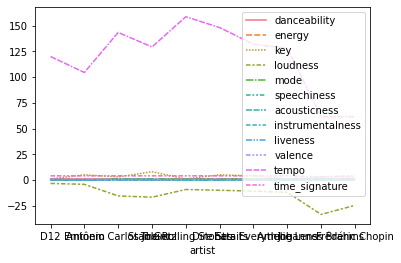

In [61]:
sns.lineplot(data=df_audio_features.drop(['duration_ms'], axis=1))
plt.show()

In [62]:
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))
 
# 3. Compute the minimum and maximum to be used for later scaling.
my_min_max.fit(df_audio_features)
 
# 4. use the scale features of X according to feature_range.
# This returns a numpy array where the order is conserved but the column names and index are not
scaled_audio_features = my_min_max.transform(df_audio_features)

# You can also combine the fit and transform steps using fit_transform
# scaled_audio_features = my_min_max.fit_transform(df_audio_features)

# 5. reconvert the transformed data back to a DataFrame
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=df_audio_features.index,
                                     columns=df_audio_features.columns)
scaled_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
Stan Getz,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
The Rolling Stones,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
Dire Straits,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
Eats Everything,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
Amelie Lens,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
Johannes Brahms,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0


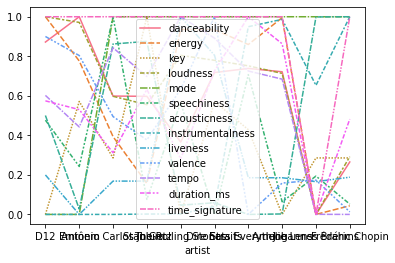

In [65]:
sns.lineplot(data=scaled_audio_features)
plt.show()

### Part 2: Try out different transformers and plot the distributions of each

In [104]:
audio_features = pd.read_csv("../data/spotify/audio_features_1000.csv",
                                index_col=["artist"])#, "artist"])

audio_features.drop(["name", "duration_ms"], axis=1, inplace=True)
#audio_features.dropna(inplace=True)

### Initial unnormalized data

In [105]:
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
artist,,,,,,,,,,,,
Elvis Presley,0.697,0.550,2,-11.496,1,0.1790,0.856,0.000034,0.0907,0.844,84.802,4
Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.591,127.150,4
The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.224,114.278,4
Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.794,88.385,4
Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.404,76.118,4


#### MinMaxScaler

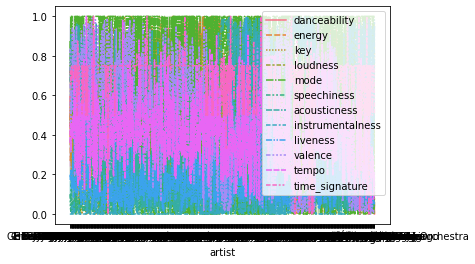

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.530576,0.507685,0.469358,0.736420,0.668349,0.115706,0.459382,0.185798,0.159773,0.476197,0.421513,0.723143
std,0.245150,0.282482,0.323061,0.154367,0.470976,0.156450,0.374829,0.338946,0.149799,0.300747,0.204389,0.111358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.349845,0.257515,0.181818,0.656943,0.000000,0.027496,0.079867,0.000000,0.072177,0.212762,0.263462,0.750000
50%,0.561035,0.546175,0.454545,0.786463,1.000000,0.046129,0.401605,0.000109,0.101939,0.480008,0.385164,0.750000
75%,0.726338,0.749493,0.727273,0.854103,1.000000,0.121834,0.867470,0.137563,0.190086,0.739486,0.551320,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_audio_features = min_max_scaler.fit_transform(audio_features)

scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

sns.lineplot(data=scaled_audio_features)
plt.show()

scaled_audio_features.describe()

#### StandardScaler

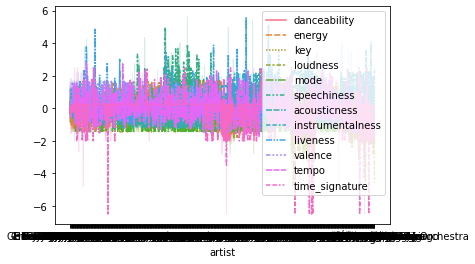

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03
mean,1.416795e-16,-4.039067e-16,-1.001112e-16,-1.770594e-16,1.156649e-15,4.962785e-18,-2.494200e-16,3.938210e-17,-5.795252e-17,7.813185e-16,-4.629798e-16,-1.799730e-15
std,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00
min,-2.165077e+00,-1.797877e+00,-1.453373e+00,-4.772291e+00,-1.419584e+00,-7.398376e-01,-1.226019e+00,-5.483618e-01,-1.066968e+00,-1.583951e+00,-2.063052e+00,-6.496231e+00
25%,-7.374937e-01,-8.859334e-01,-8.903710e-01,-5.150397e-01,-1.419584e+00,-5.640222e-01,-1.012865e+00,-5.483618e-01,-5.849689e-01,-8.762519e-01,-7.735647e-01,2.412608e-01
50%,1.242903e-01,1.363065e-01,-4.586821e-02,3.243019e-01,7.044320e-01,-4.448841e-01,-1.541983e-01,-5.480412e-01,-3.862138e-01,1.267842e-02,-1.779056e-01,2.412608e-01
75%,7.988280e-01,8.563189e-01,7.986345e-01,7.626343e-01,7.044320e-01,3.918661e-02,1.089121e+00,-1.423588e-01,2.024340e-01,8.757678e-01,6.353268e-01,2.412608e-01
max,1.915538e+00,1.743445e+00,1.643137e+00,1.708104e+00,7.044320e-01,5.654292e+00,1.442823e+00,2.403026e+00,5.611068e+00,1.742303e+00,2.831342e+00,2.487091e+00


In [107]:
std_scaler = StandardScaler()
scaled_audio_features = std_scaler.fit_transform(audio_features)

scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

sns.lineplot(data=scaled_audio_features)
plt.show()

scaled_audio_features.describe()

#### RobustScaler

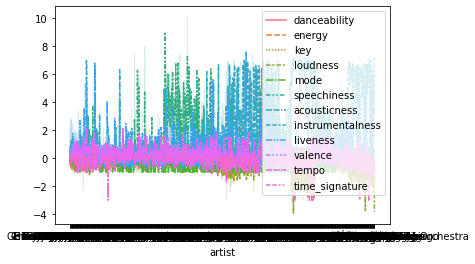

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,-0.080901,-0.078236,0.027157,-0.253822,-0.331651,0.737529,0.073358,1.349845,0.490491,-0.007236,0.126273,-0.107426
std,0.651140,0.574177,0.592278,0.782955,0.470976,1.658399,0.475912,2.463924,1.270456,0.570976,0.710034,0.445430
min,-1.490162,-1.110163,-0.833333,-3.988962,-1.000000,-0.488974,-0.509908,-0.000790,-0.864556,-0.911308,-1.338036,-3.000000
25%,-0.560940,-0.586735,-0.500000,-0.656929,-1.000000,-0.197507,-0.408503,-0.000790,-0.252419,-0.507375,-0.422786,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.439060,0.413265,0.500000,0.343071,0.000000,0.802493,0.591497,0.999210,0.747581,0.492625,0.577214,0.000000
max,1.165932,0.922449,1.000000,1.083064,0.000000,10.111218,0.759768,7.268583,7.616535,0.987217,2.135897,1.000000


In [108]:
robust_scaler = RobustScaler()
scaled_audio_features = robust_scaler.fit_transform(audio_features)

scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

sns.lineplot(data=scaled_audio_features)
plt.show()

scaled_audio_features.describe()

#### QuantileTransformer

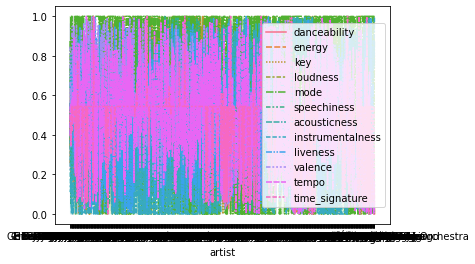

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.499991,0.499991,0.495159,0.500001,0.668349,0.500010,0.500003,0.445550,0.499998,0.500009,0.500006,0.499966
std,0.288983,0.288985,0.302193,0.288985,0.470976,0.288992,0.288990,0.350760,0.289006,0.288995,0.288990,0.171991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250371,0.250097,0.272773,0.249908,0.000000,0.248749,0.250119,0.000000,0.249750,0.250228,0.250225,0.544044
50%,0.499499,0.500000,0.487487,0.499785,1.000000,0.500000,0.499499,0.499499,0.503003,0.500501,0.499499,0.544044
75%,0.750052,0.750434,0.728228,0.749817,1.000000,0.749993,0.749888,0.750015,0.749750,0.750052,0.750127,0.544044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
quant_transform = QuantileTransformer()
scaled_audio_features = quant_transform.fit_transform(audio_features)

scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

sns.lineplot(data=scaled_audio_features)
plt.show()

scaled_audio_features.describe()